OSMAN ESHJA ARTIFICIAL INTELLIGENCE TIRANA MAY 2025

Personal discussion

Final Evaluation Exercise: Complete the following exercises


# 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.


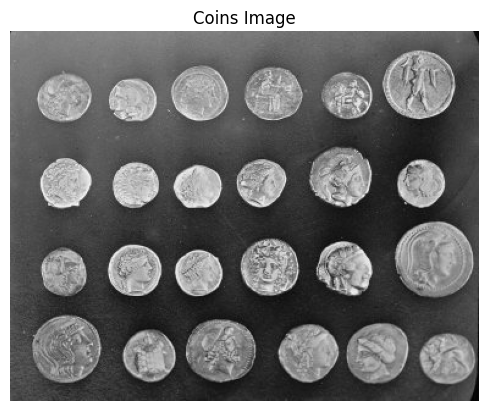

Image size: (303, 384)
Pixel grayscale range: min = 1, max = 252


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data


I = data.coins()   # 'coins' image in grayscale

# Visualization
plt.imshow(I, cmap='gray')
plt.title("Coins Image")
plt.axis('off')
plt.show()


image_shape = I.shape      # Image size and grayscale value range
min_pixel = I.min()
max_pixel = I.max()

print(f"Image size: {image_shape}")
print(f"Pixel grayscale range: min = {min_pixel}, max = {max_pixel}")



# 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

Interpretation : This histogram shows shows frequently each grayscale value  appears in the image.


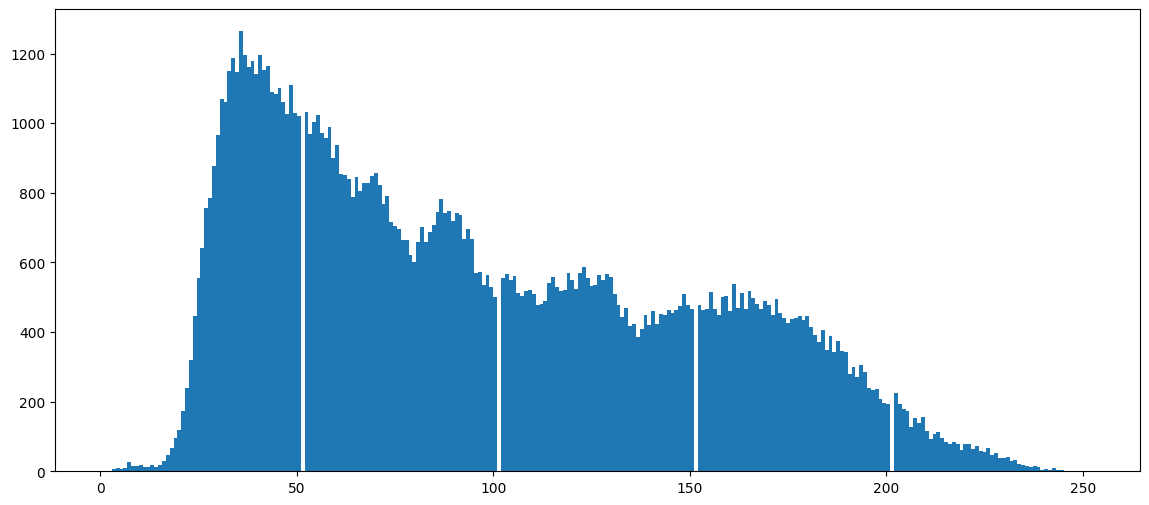

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# reshape the uint8 image as 1d array:
v = I.reshape(I.shape[0]*I.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

Interpreation : ow-Intensity Peak (0-50) , dark background areas behind and between the coins  
Mid-Intensity Peak ( 100-150) ,  shaded  areas on the coins
High-Intensity Peak (200–255): hightlighteed parts ( shiny parts of the coinss)   



# 3. Applied noise to the image and use the correct function to erase the noise.

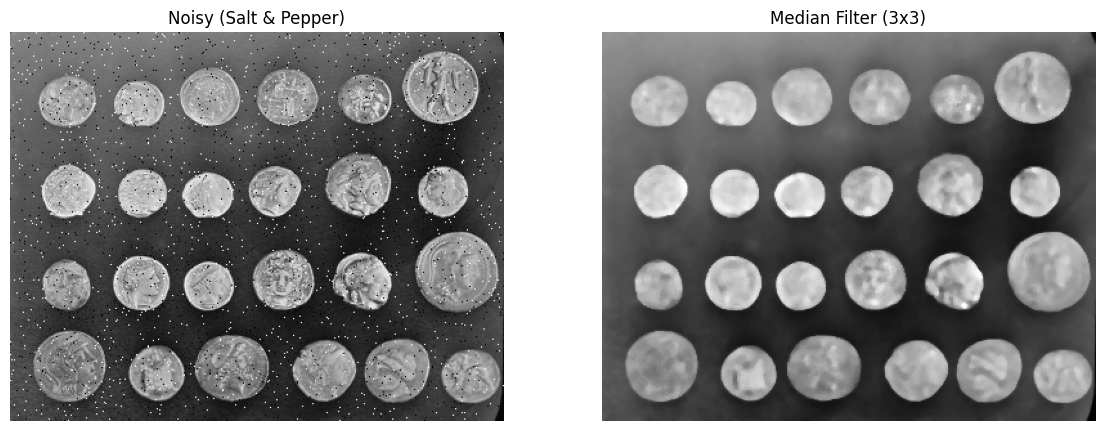

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_ubyte
from skimage.filters import median
from skimage.morphology import disk


img = data.coins()
img = img_as_ubyte(img)

#  Salt & Pepper noise (
noise = np.random.random(img.shape)
noisy_image = img.copy()
noisy_image[noise > 0.99] = 255  # Salt
noisy_image[noise < 0.01] = 0    # Pepper


selem = disk(3)        # median to remove nocise
denoised_image = median(noisy_image, selem)


def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Noisy (Salt & Pepper)')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')


plot_comparison(noisy_image, denoised_image, 'Median Filter (3x3)')
plt.savefig('denoised.png')
plt.show()


Expl:   Salt & pepper noise creates extreme black or white pixels and   Median filtering ignores extreme values and keeps the middle intensity which restores the original local pattern.

# 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

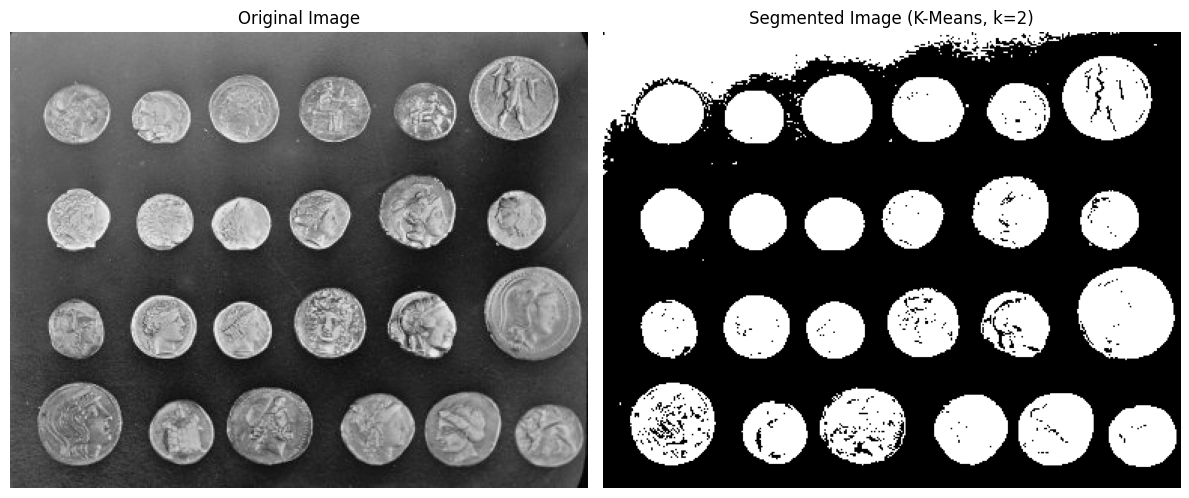

In [14]:


from sklearn.cluster import KMeans

image = data.coins()


image_2D = image.reshape((-1, 1))

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2D)

segmented_image = kmeans.labels_.reshape(image.shape)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmented_image, cmap='gray')
axes[1].set_title('Segmented Image (K-Means, k=2)')
axes[1].axis('off')

plt.tight_layout()
plt.show()



k=2 successfully segments the coins image by clustering pixel intensities into coin and background regions. While effective due to the grayscale contrast, it may misclassify edge areas bcs it doesn't consider spatial context

# 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

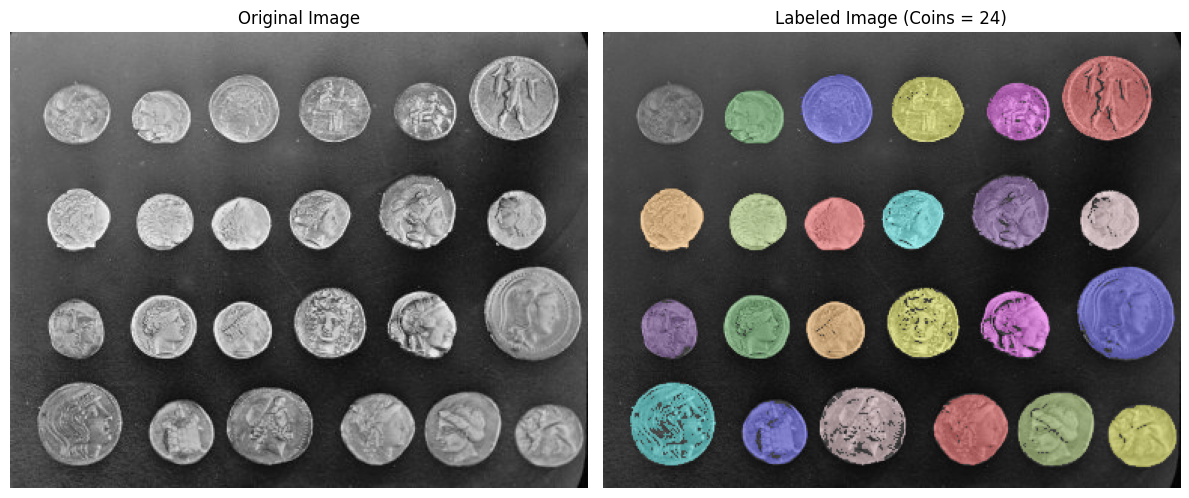

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, filters, measure, color, morphology
from skimage.segmentation import clear_border


I = data.coins()


thresh = filters.threshold_otsu(img)
binary = img > thresh
binary_clean = clear_border(morphology.remove_small_objects(binary, min_size=60))

labeled_image = measure.label(binary_clean)
num_coins = labeled_image.max()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
axes[0].imshow(I, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(color.label2rgb(labeled_image, image=I, bg_label=0))
axes[1].set_title(f'Labeled Image (Coins = {num_coins+1})')
axes[1].axis('off')

plt.tight_layout()
plt.show()





it is loaded the coins image and used Otsu’s threshold to separate the coins from the background. Then it is removed small objects and cleared borderegions to clean the binary mask After that it is labeled the connected coinsts  and visualized both the original and labeled image side by side.

Finally, It is counted the number of coins using label().max() — which gives the total number of distinct coin regions in the image.

# 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.

Average Area: 1567.13 pixels
Average Major Axis Length: 46.76 pixels
Average Orientation: 0.06 radians


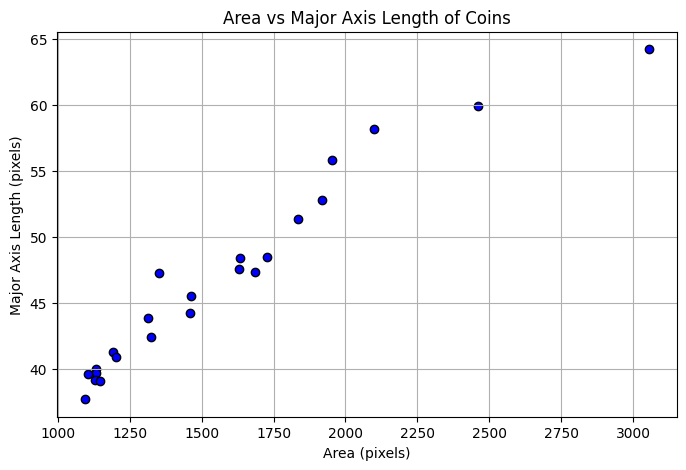

In [16]:

from skimage.segmentation import clear_border

T = filters.threshold_otsu(I)
BW = I > T


BW_clean = morphology.remove_small_objects(BW, min_size=60)   #cleaning binary mask
BW_clean = clear_border(BW_clean)


L = measure.label(BW_clean)   # here is the region labaeling


props = measure.regionprops(L)   #region exctraction


areas = []   # here it is Initialized feature lists
angles = []

for p in props:
    areas.append(p.area)
    majors.append(p.major_axis_length)
    angles.append(p.orientation)


areas = np.array(areas)    # this part here Converts to numpy arrays
majors = np.array(majors)
angles = np.array(angles)

print(f"Average Area: {areas.mean():.2f} pixels")
print(f"Average Major Axis Length: {majors.mean():.2f} pixels")
print(f"Average Orientation: {angles.mean():.2f} radians")

#Scatterplot
plt.figure(figsize=(8, 5))
plt.scatter(areas, majors, c='blue', edgecolors='k')
plt.xlabel('Area (pixels)')
plt.ylabel('Major Axis Length (pixels)')
plt.title('Area vs Major Axis Length of Coins')
plt.grid(True)
plt.show()


Area means how many pixels each coin contains
Orientation means the tilt of the fitted ellipse(radian)
Major Axis Length meeans the longest diameter of the ellipse that fits each coin
Each point = one coin and the plot shows the relationship between size and shape of the coins. If all coins are similar the points will cluster closely


# 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

Number of coins with area > 1750 pixels: 6


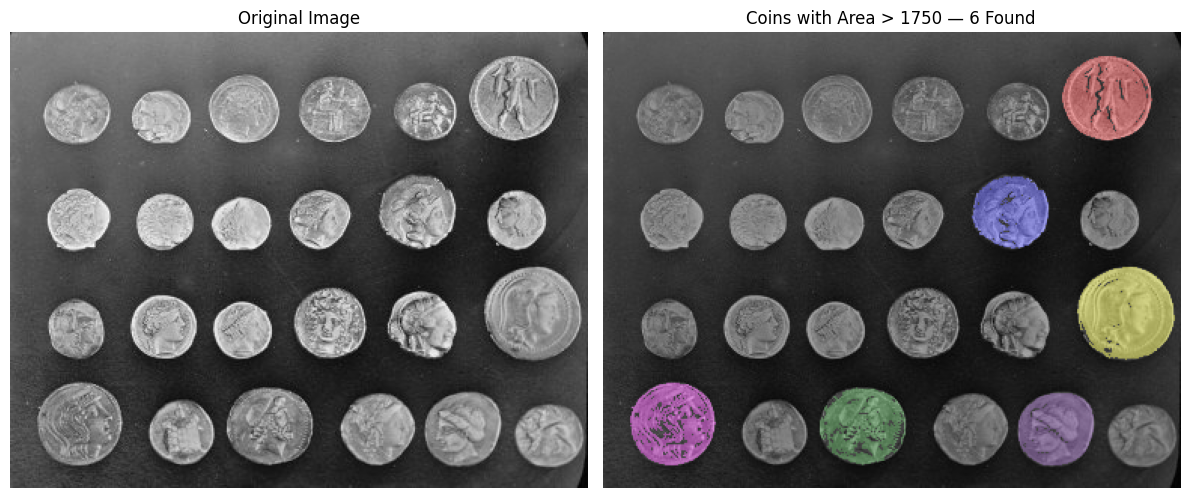

In [31]:

import matplotlib.pyplot as plt
from skimage import data, filters, measure, morphology, color
from skimage.segmentation import clear_border

I = data.coins()       # here is loading and preprocessing
T = filters.threshold_otsu(I)
BW = I > T
BW_clean = morphology.remove_small_objects(BW, min_size=50)
BW_clean = clear_border(BW_clean)
L = measure.label(BW_clean)     # labeling

props = measure.regionprops(L)  # Label connected components

large_regions = [p for p in props if p.area > 1750]   # here is filettring for pixels > 1750

print(f"Number of coins with area > 1750 pixels: {n_large}")
import numpy as np
mask_large = np.zeros_like(L)

for p in large_regions:
    mask_large[L == p.label] = p.label  # keep only large components
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(I, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(color.label2rgb(mask_large, image=I, bg_label=0))
ax[1].set_title(f"Coins with Area > 1750 — {n_large} Found")
ax[1].axis('off')

plt.tight_layout()
plt.show()


# 8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

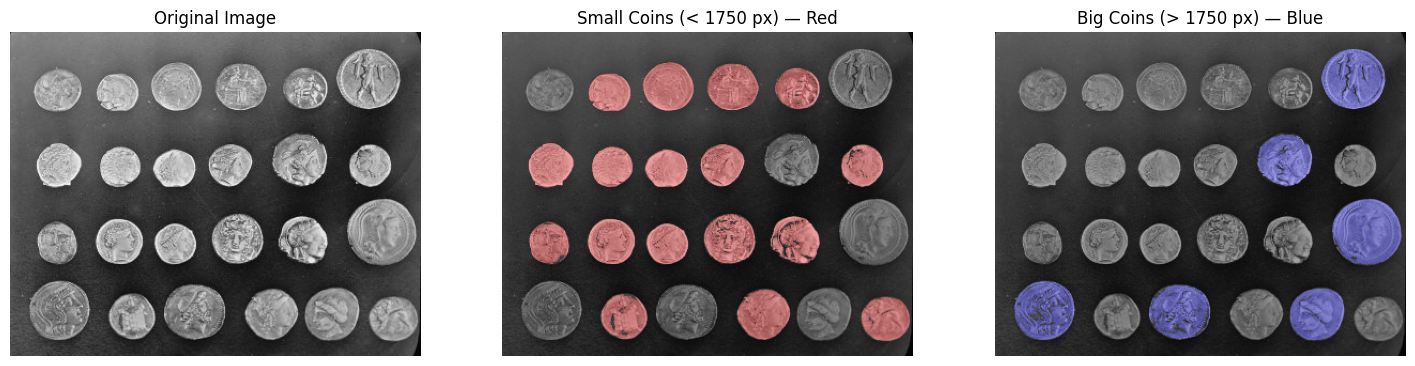

In [38]:

from skimage import data, filters, measure, morphology, color
from skimage.segmentation import clear_border


I = data.coins()
T = filters.threshold_otsu(I)
BW = I > T
BW_clean = morphology.remove_small_objects(BW, min_size=50)
BW_clean = clear_border(BW_clean)


L = measure.label(BW_clean)      # #%% Label connected components

props = measure.regionprops(L)


mask_small = np.zeros_like(L)    # creating masks for each coins
mask_big = np.zeros_like(L)

for p in props:
    if p.area > 1750:
        mask_big[L == p.label] = 1
    else:
        mask_small[L == p.label] = 1


  # here it is converted ask into small or big coins
RGB_small = color.label2rgb(mask_small, image=I, colors=['red'], bg_label=0)   # Red for small coins

RGB_big = color.label2rgb(mask_big, image=I, colors=['blue'], bg_label=0)  # Blue for big coins

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(I, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(RGB_small)
ax[1].set_title("Small Coins (< 1750 px) — Red")
ax[1].axis('off')
ax[2].imshow(RGB_big)
ax[2].set_title("Big Coins (> 1750 px) — Blue")
ax[2].axis('off')

plt.show()


# Here we can see that coins with pixels more than 1750 are in blue and the ones less then 1750 are in red.


### 9. Describe the main steps required to perform segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

1. Load the RGB image
#    - Example: skimage.data.coffee(), astronaut(), or a custom image
#    - Ensure the image is in RGB format: [H x W x 3]

# 2. Reshape the image
#     Convert the 3D RGB image into a 2D array where each row is a pixel (R, G, B)
#     Shape is [num_pixels x 3]

# 3. Normalize pixel values (optional but recommended)
#    Scale R, G, B values to [0, 1] for better clustering results

# 4. Apply a clustering algorithm (excluding K-Means)
#   Suggested alternatives:
#     DBSCAN (Density-Based Spatial Clustering)
#        -Spectral Clustering
#  
# 5. Reshape the cluster labels back to image format
#    Reshape labels into [H x W] to visualize the segmented image

# 6. Visualize the results
#     Display original image and segmented image side-by-side
#    Optionally, color the segments using cluster centroids or fixed colors

# Comparison with K-Means:
# DBSCAN can find arbitrarily shaped regions and ignores noise
# Spectral clustering is effective on complex image structures but slower


## 10. Extract the main texture features of this image

In [49]:
#%% md
# Task 10: Extract Texture Features from the 'coins' Image using GLCM (Gray-Level Co-occurrence Matrix)

#%% Imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, feature
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray


I = data.coins()
I = img_as_ubyte(I)  # Ensure 8-bit grayscal Glcm

#Compute GLCM

glcm = feature.graycomatrix(I,
                            distances=[1],
                            angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                            symmetric=True,
                            normed=True)

#Extract GLCM-based texture features
contrast = feature.graycoprops(glcm, prop='contrast')[0]
correlation = feature.graycoprops(glcm, prop='correlation')[0]
energy = feature.graycoprops(glcm, prop='energy')[0]
homogeneity = feature.graycoprops(glcm, prop='homogeneity')[0]


print("Texture Features (averaged across 4 directions):")
print(f"Contrast:     {np.mean(contrast):.4f}")
print(f"Correlation:  {np.mean(correlation):.4f}")
print(f"Energy:       {np.mean(energy):.4f}")
print(f"Homogeneity:  {np.mean(homogeneity):.4f}")


Texture Features (averaged across 4 directions):
Contrast:     435.0948
Correlation:  0.9224
Energy:       0.0179
Homogeneity:  0.2040


constast : Very high → the image contains strong local intensity changes (sharp edges, deep shadows). Coin edges and background contrast are strong.
correlation : Very high → the image contains strong local intensity changes (sharp edges, deep shadows). Coin edges and background contrast are strong.
energy : Low → indicates texture is not uniform. There’s significant variation in pixel patterns. This is typical for real-world scenes with shadows and object boundaries.
homogenity : Low → indicates texture is not uniform. There’s significant variation in pixel patterns. This is typical for real-world scenes with shadows and object boundaries.

# Personal discussion

I learned how to apply practical techniques such as segmentation, filtering, and feature extraction.
Working with real images helped me understand the challenges and solutions in visual data processing.  The professor was knowledgeable, supportive and it was a very great pleasure to  learn from a spanish professor.
Thank you very much for the valuable guidance and engaging teaching style!